# Introduction to Neural network classification with TensorFlow

In [3]:
#Types of classification: Binary, Multiclass, Multilabel
#Create data to view and fit
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [6]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


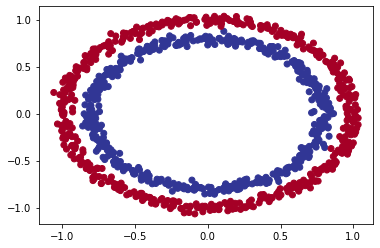

In [9]:
#Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [20]:
#Steps in Modeling
import tensorflow as tf
tf.random.set_seed(42)
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(100))
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics = ["accuracy"])
model_1.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 530us/step - loss: 3.7029 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 557us/step - loss: 1.0662 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 575us/step - loss: 0.8493 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 520us/step - loss: 0.7827 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 656us/step - loss: 0.7675 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 668us/step - loss: 0.7247 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 587us/step - loss: 0.7271 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 749us/step - loss: 0.7214 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 622us/step - loss: 0.7217 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0

32/32 [==============================] - 0s 507us/step - loss: 0.6939 - accuracy: 0.0025
Epoch 79/100
32/32 [==============================] - 0s 521us/step - loss: 0.6944 - accuracy: 0.0000e+00
Epoch 80/100
32/32 [==============================] - 0s 546us/step - loss: 0.6938 - accuracy: 0.0000e+00
Epoch 81/100
32/32 [==============================] - 0s 550us/step - loss: 0.6945 - accuracy: 0.0068
Epoch 82/100
32/32 [==============================] - 0s 509us/step - loss: 0.6938 - accuracy: 0.0061
Epoch 83/100
32/32 [==============================] - 0s 483us/step - loss: 0.6928 - accuracy: 0.0019
Epoch 84/100
32/32 [==============================] - 0s 527us/step - loss: 0.6936 - accuracy: 0.0000e+00
Epoch 85/100
32/32 [==============================] - 0s 530us/step - loss: 0.6942 - accuracy: 6.8327e-04
Epoch 86/100
32/32 [==============================] - 0s 482us/step - loss: 0.6941 - accuracy: 0.0085
Epoch 87/100
32/32 [==============================] - 0s 539us/step - loss: 0.6

In [21]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 372us/step - loss: 0.6932 - accuracy: 0.0260


[0.6931750774383545, 0.026000000536441803]

In [22]:
#Visualize
import numpy as np
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu,alpha= 0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

doing multiclass classification


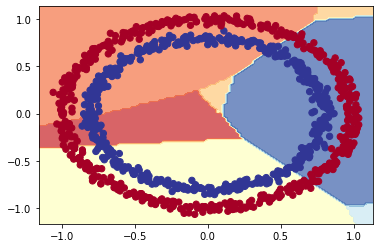

In [26]:
plot_decision_boundary(model = model_1,X = X,y = y)

Non-linearity

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1, activation = tf.keras.activations.linear))
model_2.compile(loss="binary_crossentropy",
               optimizer = tf.keras.optimizers)